**Task 2:**

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

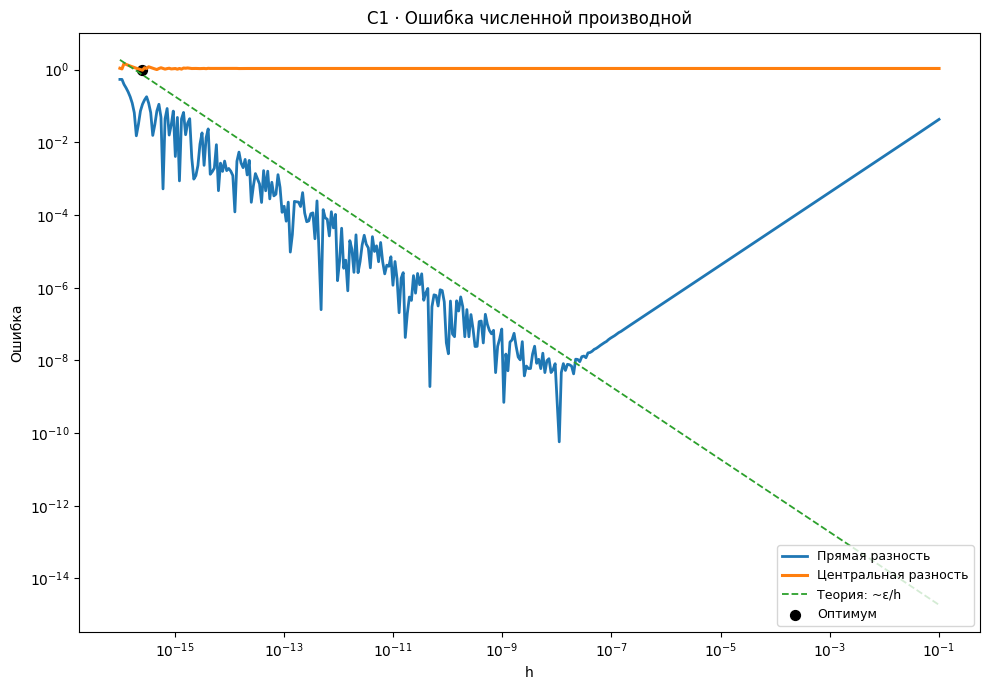

In [15]:
# ==========================
# C1 · ДЗ: Истинная точность численной производной
# ==========================


x0 = 1
f = np.sin
df = np.cos
true = df(x0)
eps = np.finfo(float).eps
h = np.logspace(-16, -1, 400)


# TODO
def forward_diff(f, x, h):
    """заполнить здесь код"""
    deriv = (f(x + h) - f(x)) / h
    #raise NotImplementedError
    return deriv


# TODO
def central_diff(f, x, h):
    """заполнить здесь код"""
    deriv = (f(x - h) - f(x + h)) / (2 * h)
    #raise NotImplementedError
    return deriv


# !!!ЗДЕСЬ НЕ НУЖНО МЕНЯТЬ, ЭТО ВЫВОД КАРТИНОК!!!
def theory_lines(h, x0=x0):
    """Оценки ошибок усечения и округления"""
    C_trunc = abs(np.cos(x0)) / 6
    C_round = abs(np.sin(x0)) * eps
    round_line = C_round / h
    return round_line


def make_figure():
    approx_f = forward_diff(f, x0, h)
    approx_c = central_diff(f, x0, h)
    err_f = np.abs(approx_f - true)
    err_c = np.abs(approx_c - true)
    round_line = theory_lines(h)
    imin = np.argmin(err_c)
    plt.figure(figsize=(10, 7))
    sns.lineplot(x=h, y=err_f, label="Прямая разность", lw=2)
    sns.lineplot(x=h, y=err_c, label="Центральная разность", lw=2.2)
    plt.loglog(h, round_line, '--', label="Теория: ~ε/h", lw=1.3)
    plt.scatter([h[imin]], [err_c[imin]], s=50, color='black', label="Оптимум")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("h")
    plt.ylabel("Ошибка")
    plt.title("C1 · Ошибка численной производной")
    plt.legend(loc="lower right", fontsize=9)
    plt.tight_layout()
    plt.show()
    
make_figure()

In [ ]:
# ==========================
# C2 · ДЗ: Феномен Гиббса и сумма Фежера
# ==========================


#TODO
def square_wave(x):
    """Идеальная квадратная волна (±1)."""
    raise NotImplementedError


#TODO
def fourier_square_wave(x, N):
    """Реализация формулы"""
    raise NotImplementedError


# !!!ЗДЕСЬ НЕ НУЖНО МЕНЯТЬ, ЭТО ВЫВОД КАРТИНОК/СЛУЖЕБНОЕ!!!
def fejer_sum_square(x, N):
    ks = np.arange(1, N+1, 2)
    weights = 1 - ks/(N+1.0)
    s = np.sum(weights[:, None] * (np.sin(np.outer(ks, x))/ks[:,
    None]), axis=0)
    return (4/np.pi) * s

    
def plot_pair(N, zoom=False):
    x = np.linspace(-np.pi, np.pi, 4000)
    y_true = square_wave(x)
    yN = fourier_square_wave(x, N)
    yF = fejer_sum_square(x, N)
    if zoom:
    mask = (x > -0.6) & (x < 0.6)
    x, y_true, yN, yF = x[mask], y_true[mask], yN[mask], yF[mask]
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_true, linewidth=2.2, label="square", color="black")
    plt.plot(x, yN, linewidth=1.6, label=f"Фурье для N={N}")
    plt.plot(x, yF, linewidth=1.6, label=f"Фежер для N={N}")
    if not zoom:
    plt.ylim(-1.5, 1.5)
    else:
    plt.ylim(0.5, 1.4)
    plt.axhline(1.0, color="gray", linewidth=1.0, linestyle="--")
    plt.axvline(0.0, color="gray", linewidth=1.0, linestyle="--")
    plt.xlabel("x"); plt.ylabel("value")
    plt.title("C2 · Гиббис и Фежер (zoom)" if zoom else "C2 · Гиббис и
    Фежер")
    plt.legend()
    plt.tight_layout()
    plt.show()

              
# Пример:
for N in [5, 25, 125]:
    plot_pair(N, zoom=False)
    plot_pair(N, zoom=True)